In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing


In [2]:
main_data = keras.datasets.fashion_mnist.load_data

In [8]:
print(main_data)
type(main_data)
main_data

<function load_data at 0x7c9f627500d0>


<function keras.src.datasets.fashion_mnist.load_data()>

In [11]:
(x_train, y_train), (x_test, y_test) = main_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
print("x_train.shape",x_train.shape)
print("y_train.shape",y_train.shape)
print("x_test.shape",x_test.shape)
print("y_test.shape",y_test.shape)

x_train.shape (60000, 28, 28)
y_train.shape (60000,)
x_test.shape (10000, 28, 28)
y_test.shape (10000,)


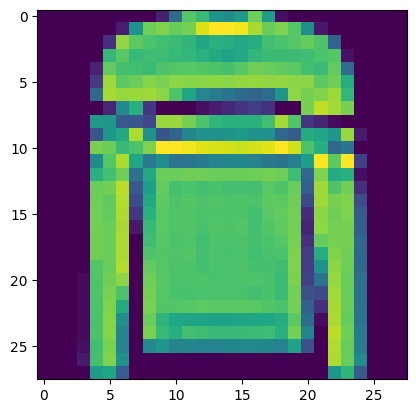

In [13]:
plt.imshow(x_train[5])

In [14]:
x_train, x_test = x_train / 255.0, x_test / 255.0

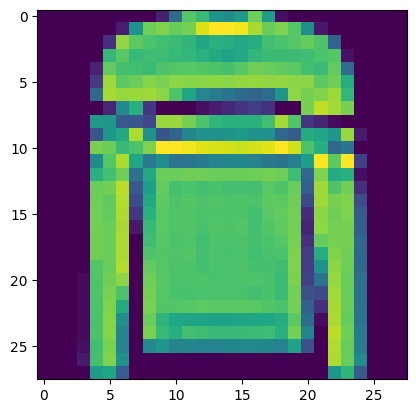

In [16]:
plt.imshow(x_train[5])

In [18]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape = [28,28]),
                                 keras.layers.Dense(100, activation = "relu"),
                                 keras.layers.Dense(50, activation = "relu"),
                                 keras.layers.Dense(10, activation = "softmax")
                                  ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [21]:
run_model = model.fit(x_train, y_train, epochs = 10, validation_split=0.20)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6408 - loss: 1.0897 - val_accuracy: 0.8094 - val_loss: 0.5575
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8162 - loss: 0.5370 - val_accuracy: 0.8323 - val_loss: 0.4869
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8381 - loss: 0.4692 - val_accuracy: 0.8472 - val_loss: 0.4468
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8438 - loss: 0.4513 - val_accuracy: 0.8479 - val_loss: 0.4405
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8500 - loss: 0.4260 - val_accuracy: 0.8508 - val_loss: 0.4240
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8552 - loss: 0.4089 - val_accuracy: 0.8577 - val_loss: 0.4068
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8616 - loss: 0.3920 - val_accuracy: 0.8617 - val_loss: 0.3998
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8669 - loss: 0.3759 - 

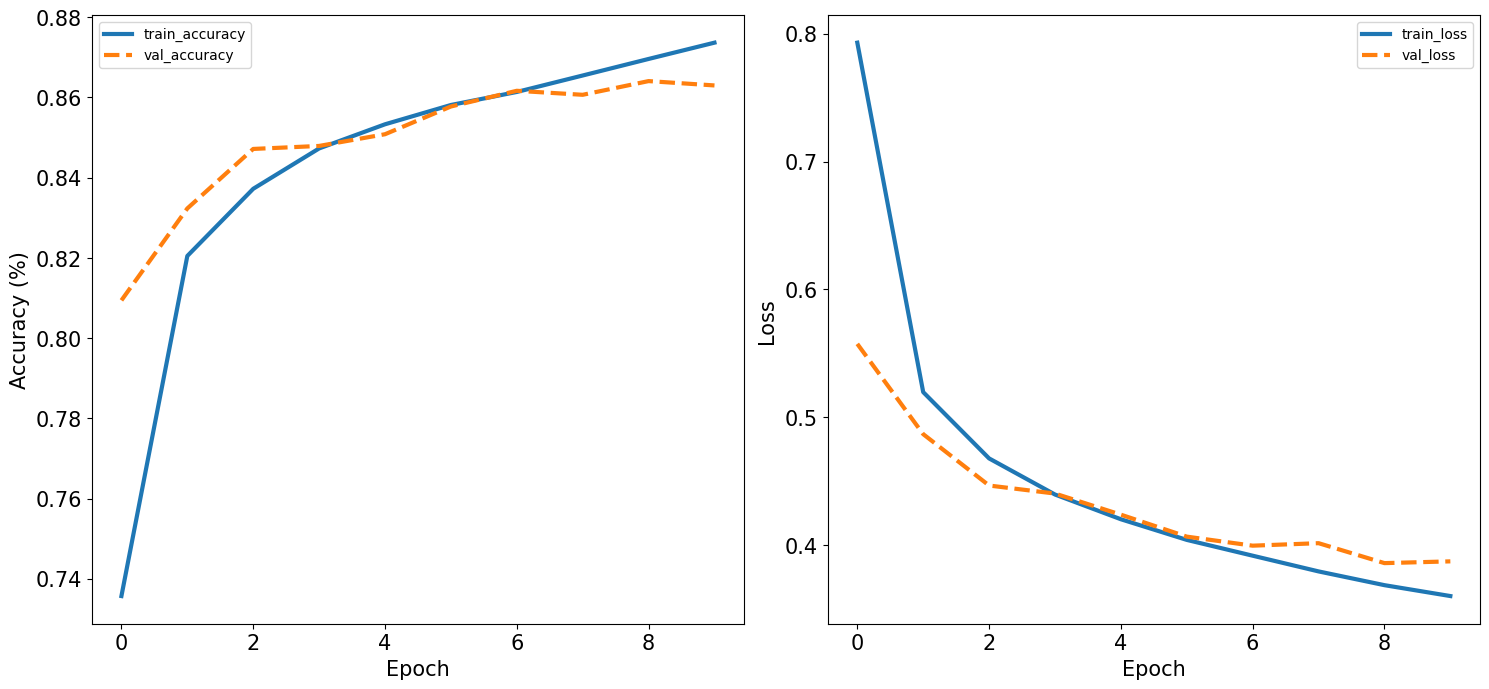

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))  # Adjust figsize as needed
ax1.plot(run_model.history["accuracy"], label="train_accuracy", lw = 3, linestyle ='-')
ax1.plot(run_model.history["val_accuracy"], label="val_accuracy", lw = 3, linestyle ='--')
ax1.set_ylabel('Accuracy (%)', fontsize=15)
ax1.set_xlabel('Epoch', fontsize=15)
ax1.legend()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.plot(run_model.history["loss"], label="train_loss", lw = 3, linestyle ='-')
ax2.plot(run_model.history["val_loss"], label="val_loss", lw = 3, linestyle ='--')
ax2.set_ylabel('Loss ', fontsize=15)
ax2.set_xlabel('Epoch', fontsize=15)
ax2.legend()
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()


In [28]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8594 - loss: 0.4029


[0.41069287061691284, 0.8561999797821045]